In [4]:
!pip install opencv-python


In [2]:
import os
import pandas as pd
import cv2
import numpy as np
import shutil, os

In [3]:
#!unzip Data

Archive:  Data.zip
  inflating: Classes.xlsx            
  inflating: images/005.Crested_Auklet/Crested_Auklet_0001_794941.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0003_794962.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0005_794922.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0006_1813.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0010_794907.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0011_794927.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0012_794960.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0013_794914.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0018_1817.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0019_794925.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0021_794938.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0028_794951.jpg  
  inflating: images/005.Crested_Auklet/Crested_Auklet_0029_1824.jpg  
  inflating: 

In [5]:

data_path = '../Data/images'
#data_path = './images'
class_folders = os.listdir(data_path)
print (class_folders)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(class_folders))

['005.Crested_Auklet', '013.Bobolink', '015.Lazuli_Bunting', '023.Brandt_Cormorant', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '067.Anna_Hummingbird', '072.Pomarine_Jaeger', '076.Dark_eyed_Junco', '081.Pied_Kingfisher', '082.Ringed_Kingfisher', '086.Pacific_Loon', '099.Ovenbird', '104.American_Pipit', '127.Savannah_Sparrow', '135.Bank_Swallow', '141.Artic_Tern', '149.Brown_Thrasher', '156.White_eyed_Vireo', '168.Kentucky_Warbler']
Types of classes labels found:  20


In [5]:
from keras_preprocessing.image import load_img
from tensorflow.keras.utils import load_img

In [6]:
class_labels = []
im_size = 224
images = []
labels = []
for class_folder in class_folders:
    class_images = os.listdir(data_path+'/'+class_folder)
    #print(images)
    for image in class_images:
        image_path = str(data_path+'/'+class_folder) + '/' + image
        class_labels.append((class_folder, image_path, image))
        img = cv2.imread(image_path)
        #print(image_path)
        #img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(class_folder)
        #print((class_name, str(data_path+'/'+class_name) + '/' + image))
#print(class_labels)

In [7]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image', 'image_name'])
#print(df.head())
print(df.tail())

                   Labels                                              image  \
1171  072.Pomarine_Jaeger  ./images/072.Pomarine_Jaeger/Pomarine_Jaeger_0...   
1172  072.Pomarine_Jaeger  ./images/072.Pomarine_Jaeger/Pomarine_Jaeger_0...   
1173  072.Pomarine_Jaeger  ./images/072.Pomarine_Jaeger/Pomarine_Jaeger_0...   
1174  072.Pomarine_Jaeger  ./images/072.Pomarine_Jaeger/Pomarine_Jaeger_0...   
1175  072.Pomarine_Jaeger  ./images/072.Pomarine_Jaeger/Pomarine_Jaeger_0...   

                           image_name  
1171  Pomarine_Jaeger_0033_795749.jpg  
1172  Pomarine_Jaeger_0011_795777.jpg  
1173   Pomarine_Jaeger_0002_61361.jpg  
1174   Pomarine_Jaeger_0014_61335.jpg  
1175  Pomarine_Jaeger_0022_795747.jpg  


In [8]:
images = np.array(images)

<ipython-input-8-2bbd740f17cb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y, len(y))
print(set(y))

['023.Brandt_Cormorant' '023.Brandt_Cormorant' '023.Brandt_Cormorant' ...
 '072.Pomarine_Jaeger' '072.Pomarine_Jaeger' '072.Pomarine_Jaeger']
[3 3 3 ... 7 7 7] 1176
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [10]:
y=y.reshape(-1,1)
print(y)

[[3]
 [3]
 [3]
 ...
 [7]
 [7]
 [7]]


In [11]:

encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)

encoded_y = encoder.fit_transform(y)

print(encoded_y[0:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math

bird, species = shuffle(df[['image', 'image_name', 'Labels']], df['Labels'], random_state = 5)
print(len(bird))
X_train, X_test, y_train, y_test = train_test_split(bird, species,
                                                    stratify=y, train_size=math.ceil(0.7*len(bird))
                                                    )
X_cross_val, X_test, y_cross_val, y_test = train_test_split(X_test, y_test,
                                                    stratify=y_test, 
                                                    train_size=math.ceil(0.15*len(bird)))
print(X_train.shape)
print(X_test.shape)
print(X_cross_val.shape)

print(X_train.head(8))
print(y_train.shape)
print(y_test.shape)
print(y_cross_val.shape)

1176
(824, 3)
(175, 3)
(177, 3)
                                                  image  \
1069  ./images/040.Olive_sided_Flycatcher/Olive_Side...   
665       ./images/099.Ovenbird/Ovenbird_0095_92796.jpg   
381   ./images/067.Anna_Hummingbird/Anna_Hummingbird...   
224   ./images/135.Bank_Swallow/Bank_Swallow_0002_12...   
302   ./images/082.Ringed_Kingfisher/Ringed_Kingfish...   
9     ./images/023.Brandt_Cormorant/Brandt_Cormorant...   
925   ./images/086.Pacific_Loon/Pacific_Loon_0052_75...   
348   ./images/082.Ringed_Kingfisher/Ringed_Kingfish...   

                                 image_name                      Labels  
1069  Olive_Sided_Flycatcher_0041_30470.jpg  040.Olive_sided_Flycatcher  
665                 Ovenbird_0095_92796.jpg                099.Ovenbird  
381         Anna_Hummingbird_0094_56092.jpg        067.Anna_Hummingbird  
224            Bank_Swallow_0002_129654.jpg            135.Bank_Swallow  
302        Ringed_Kingfisher_0040_72852.jpg       082.Ringed_Kingf

In [14]:
import shutil, os
train_folder = "./training"
cross_val_folder = "./validation"
test_folder = "./testing"
folders = [train_folder,cross_val_folder, test_folder]

In [15]:
for folder in folders:
    if os.path.exists(folder):
        shutil.rmtree(folder)

In [16]:
for folder in folders:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [17]:
folder = train_folder
data = X_train
for index, row in data.iterrows():
    if not os.path.exists(folder+"/"+row["Labels"]):
          os.mkdir(folder+"/"+row["Labels"])
    shutil.copyfile(row["image"], folder+"/"+row["Labels"]+"/"+row["image_name"] )

In [18]:
folder = cross_val_folder
data = X_cross_val
for index, row in data.iterrows():
    if not os.path.exists(folder+"/"+row["Labels"]):
          os.mkdir(folder+"/"+row["Labels"])
    shutil.copyfile(row["image"], folder+"/"+row["Labels"]+"/"+row["image_name"] )

In [19]:
folder = test_folder
data = X_test
for index, row in data.iterrows():
    if not os.path.exists(folder+"/"+row["Labels"]):
          os.mkdir(folder+"/"+row["Labels"])
    shutil.copyfile(row["image"], folder+"/"+row["Labels"]+"/"+row["image_name"] )

In [20]:
n_classes = 20
image_size = 224
channels = 3

In [21]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf
from tensorflow.keras import activations

In [22]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.3 MB/s 


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
import albumentations as albu
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization,Activation
from keras.optimizers import Adam
import efficientnet.keras as efn

In [24]:
batch_size = 5

In [25]:
def resize_img(img, shape):
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

In [26]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    brightness_range=[0.2,1.0],
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [28]:
cross_val_datagen = ImageDataGenerator(
    brightness_range=[0.2,1.0],
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )

In [29]:
test_datagen = ImageDataGenerator(
    brightness_range=[0.2,1.0],
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )

In [30]:
train_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (224, 224),
                                                 batch_size = 5,
                                                 class_mode = 'categorical',
                                                 shuffle = True)
     

Found 824 images belonging to 20 classes.


In [31]:
test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical', shuffle = False)
     

Found 175 images belonging to 20 classes.


In [32]:
cross_val_set = test_datagen.flow_from_directory(cross_val_folder,
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical', shuffle = True)

Found 177 images belonging to 20 classes.


In [33]:
train_crops= crop_generator(train_set, 224)
cross_val_crops = crop_generator(cross_val_set, 224)

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(image_size, image_size, channels))
base_model.trainable = False ## Not trainable weights

## Preprocessing input


58889256/58889256 [==============================] - 3s 0us/step


In [40]:
model = Sequential()
model.add(base_model)
#model.add(MaxPooling2D())#
model.add(BatchNormalization())#
model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))#
#model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 512)        2048      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 20)               

In [41]:
optimizer = Adam(learning_rate=0.001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
epochs = 50

In [43]:
with tf.device('/GPU:0'):
    model_history = model.fit_generator(train_set, validation_data = cross_val_set, callbacks = [early_stop, rlrop],verbose = 1, epochs = epochs)

Epoch 1/50


<ipython-input-43-05e8abbee5f6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_set, validation_data = cross_val_set, callbacks = [early_stop, rlrop],verbose = 1, epochs = epochs)


165/165 [==============================] - 23s 137ms/step - loss: 2.7966 - accuracy: 0.1566 - val_loss: 2.2910 - val_accuracy: 0.4124 - lr: 0.0010
Epoch 2/50
165/165 [==============================] - 18s 112ms/step - loss: 2.2956 - accuracy: 0.4260 - val_loss: 1.9152 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 3/50
165/165 [==============================] - 20s 119ms/step - loss: 1.9359 - accuracy: 0.5643 - val_loss: 1.5889 - val_accuracy: 0.5876 - lr: 0.0010
Epoch 4/50
165/165 [==============================] - 18s 111ms/step - loss: 1.6359 - accuracy: 0.6359 - val_loss: 1.3797 - val_accuracy: 0.7006 - lr: 0.0010
Epoch 5/50
165/165 [==============================] - 19s 113ms/step - loss: 1.4245 - accuracy: 0.6566 - val_loss: 1.2044 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 6/50
165/165 [==============================] - 19s 113ms/step - loss: 1.3081 - accuracy: 0.6735 - val_loss: 1.1513 - val_accuracy: 0.6836 - lr: 0.0010
Epoch 7/50
165/165 [==============================] - 19s 117ms

In [44]:
model.save_weights("bird_vgg16_weights")

In [45]:
valid_loss, valid_accuracy = model.evaluate_generator(generator = cross_val_set, verbose = 1)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")

<ipython-input-45-ffedbab5485b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(generator = cross_val_set, verbose = 1)


36/36 [==============================] - 3s 93ms/step - loss: 0.7497 - accuracy: 0.7684
Validation Accuracy:  76.84 %


In [46]:

y_pred = model.predict_generator(generator = test_set, verbose=1)
y_pred = np.argmax(y_pred, axis=1)



<ipython-input-46-9101c4de45d7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator = test_set, verbose=1)


35/35 [==============================] - 3s 92ms/step


In [47]:

y_true = test_set.classes
test_accuracy = accuracy_score(y_true, y_pred)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

Test Accuracy:  80.0 %


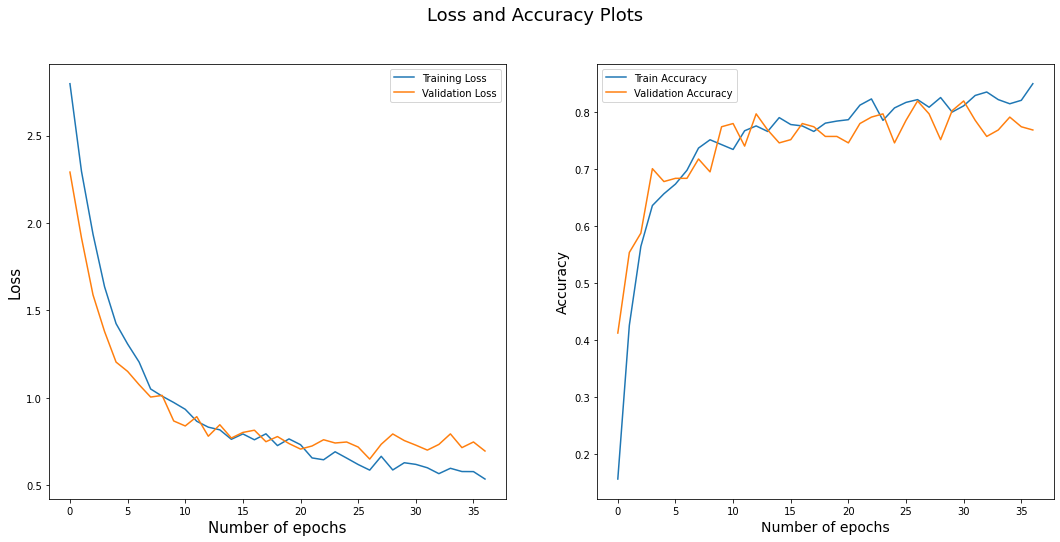

In [48]:
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [49]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true, y_pred))

print(metrics.classification_report(y_true, y_pred, digits=3))

[[ 7  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  7  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  6  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  0  0  1  0  0]
 [ 0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  5  0  0

Ref: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

https://www.youtube.com/watch?v=fCtMf6qHtdk

https://jkjung13.medium.com/extending-keras-imagedatagenerator-to-support-random-cropping-f586b1b7c450
